# Name : Harshawardhan Chitnis
# Roll No : 17
# Name : Ishwari Kulkarni
# Roll No : 34

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('Mall_customers.csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data2 = data.drop(['CustomerID'], axis=1)

Text(0, 0.5, 'Spending Score')

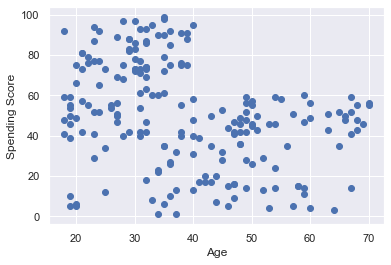

In [5]:
plt.scatter(data2['Age'],data2['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [6]:
from sklearn import preprocessing

In [7]:
x = data2[['Age' ,'Spending Score (1-100)']]

In [8]:
x_scaled = preprocessing.scale(x)

In [9]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [10]:
wcss

[400.0,
 189.38749033992428,
 124.32628617921526,
 89.76521676586151,
 71.09364141459412,
 53.128438356294,
 45.90379861201204,
 39.28688720413328,
 33.750482993581606]

Text(0, 0.5, 'Within-cluster Sum of Squares')

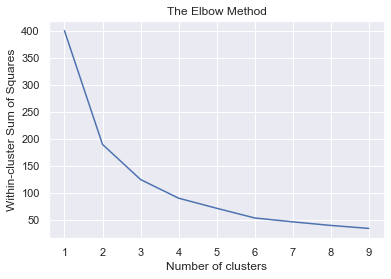

In [11]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [12]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [13]:
data_with_clusters = data2.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled) 
data_with_clusters.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2


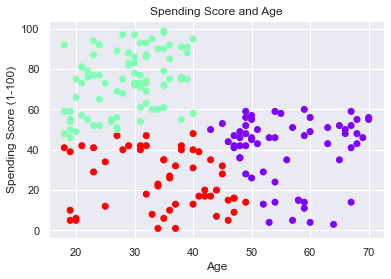

In [14]:
plt.scatter(data2['Age'],data2['Spending Score (1-100)'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Spending Score and Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
x2 = data2[['Spending Score (1-100)', 'Annual Income (k$)']]
x2_scaled = preprocessing.scale(x2)

In [16]:
kmeans2 = KMeans(3)
kmeans2.fit(x2_scaled)

KMeans(n_clusters=3)

In [17]:
data_with_clusters2 = data2.copy()
data_with_clusters2['Clusters'] = kmeans2.fit_predict(x2_scaled) 
data_with_clusters2

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,1
197,Male,32,126,74,2
198,Male,32,137,18,1


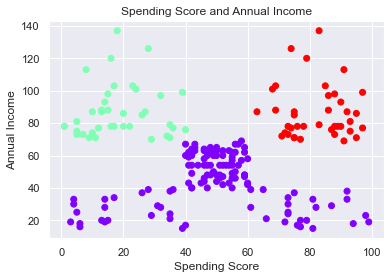

In [18]:
plt.scatter(data2['Spending Score (1-100)'],data2['Annual Income (k$)'], c=data_with_clusters2['Clusters'], cmap='rainbow')
plt.title('Spending Score and Annual Income')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()